## Gradient Descent

### What is Gradient?

Gradient is a tangent vector to a function that points in the direction of the function's greatest increase. Gradient is zero at a local maximum or minimum because there is no single direction of increase. In mathematics, gradient is defined as the partial derivative of each function's input variable.

For example, we have a function:

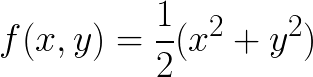

The figure of function is shown below and we can see that the minimum of function is (0, 0).

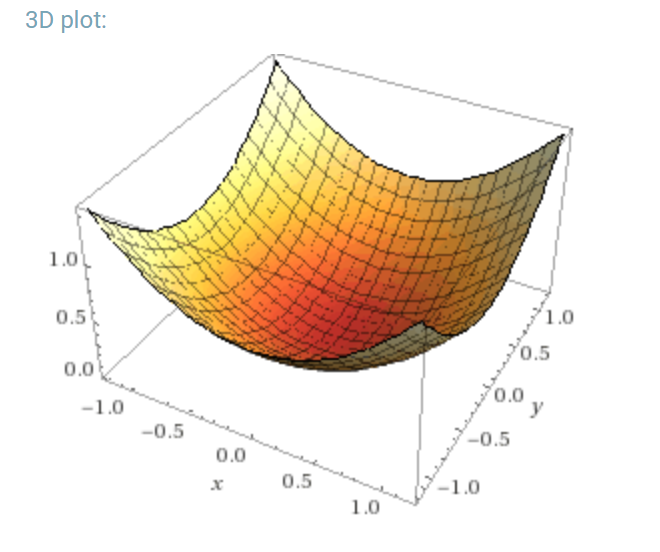

In this case, x-component of gradient is the partial derivative respect to x and y-component of gradient is the partial derivative respect to y. The gradient of function above is:

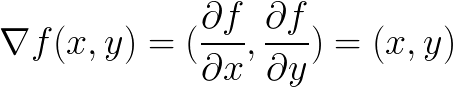

If we want to find the direction that increases the function at most at point (1, 2), we can plug (1, 2) into the formula above and get: **Direction(1,2)**

### What is Gradient Descent?

Gradient Descent is an optimization algorithm for finding a local minimum of a differentiable function. Gradient descent is simply used in machine learning to find the values of a function's parameters (coefficients) that minimize a cost function as far as possible.

As gradient is a vector pointing at the greatest increase of a function, negative gradient is a vector pointing at the greatest decrease of a function.
As a result, we can minimise a function by shifting a small amount in the direction of negative gradient repeatedly. Gradient descent follows this principle.

Consider a blinded guy attempting to reach the summit of a hill with the fewest steps feasible. He may begin climbing the hill by taking really large steps in the steepest direction, which he can do as long as he is not near the summit. However, as he gets closer to the summit, his steps will become smaller and smaller in order to prevent overshooting it. The gradient may be used to mathematically explain this process.

Consider the figure below as a top-down view of our hill, with the red arrows representing our climber's steps. Consider a gradient in this case as a vector that contains the direction of the blinded man's steepest step as well as the length of that step.

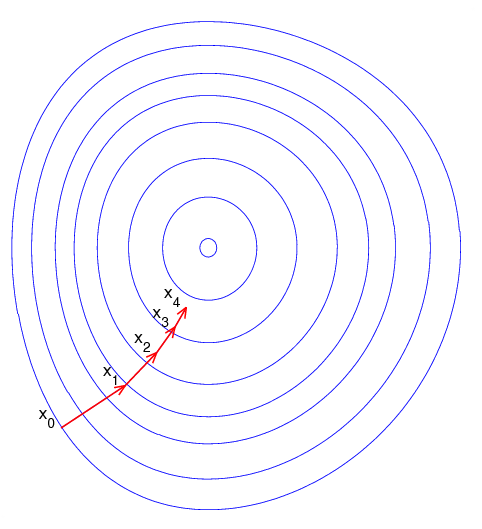

Note that the gradient ranging from X0 to X1 is much longer than the one reaching from X3 to X4. This is because the steepness/slope of the hill, which determines the length of the vector, is less. This perfectly represents the example of the hill because the hill is getting less steep the higher it's climbed. Therefore a reduced gradient goes along with a reduced slope and a reduced step size for the hill climber.

### How Gradient Descent Works?

Instead of climbing up a hill, think of gradient descent as hiking down to the bottom of a valley. This is a better analogy because it is a minimization algorithm that minimizes a given function.


The equation below describes what gradient descent does: b is the next position of our climber, while a represents his current position. The minus sign refers to the minimization part of gradient descent. The gamma in the middle is a waiting factor and the gradient term ( Δf(a) ) is simply the direction of the steepest descent.

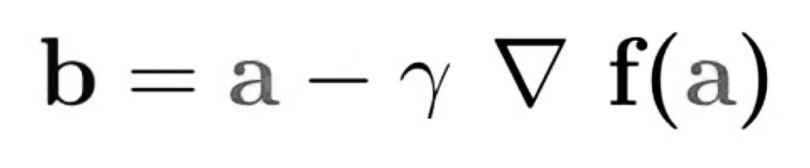

So this formula basically tells us the next position we need to go, which is the direction of the steepest descent. Let's look at another example to really drive the concept home. 

Imagine you have a machine learning problem and want to train your algorithm with gradient descent to minimize your cost-function J(w, b) and reach its local minimum by tweaking its parameters (w and b). The image below shows the horizontal axes represent the parameters (w and b), while the cost function J(w, b) is represented on the vertical axes. Gradient descent is a convex function.

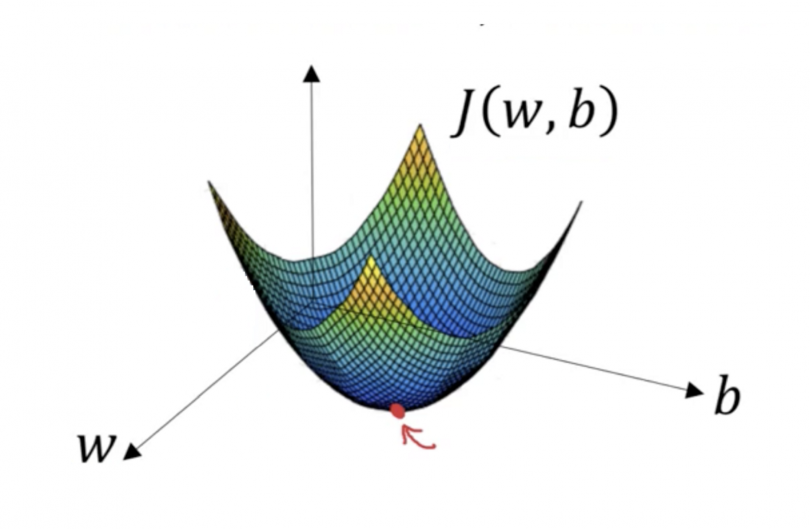

We know we want to find the values of w and b that correspond to the minimum of the cost function (marked with the red arrow). To start finding the right values we initialize w and b with some random numbers. Gradient descent then starts at that point (somewhere around the top of our illustration), and it takes one step after another in the steepest downside direction (i.e., from the top to the bottom of the illustration) until it reaches the point where the cost function is as small as possible.

### Learning Rate

How big the steps are gradient descent takes into the direction of the local minimum are determined by the learning rate, which figures out how fast or slow we will move towards the optimal weights.

We must adjust the learning rate to an acceptable value, which is neither too low nor too high, for gradient descent to reach the local minimum. Because it bounces back and forth between the convex function of gradient descent and the local minimum, if the steps it takes are too large, it may not achieve the local minimum (see left image below). Gradient descent will ultimately achieve the local minimum if the learning rate is set to a very low number, but it may take some time (see the right image).

So, the learning rate should never be too high or too low for this reason. You can check if you’re learning rate is doing well by plotting it on a graph.

## Types of Gradient Descent

### Batch Gradient Descent

Batch Gradient Descent uses the whole batch of training data at every step. It calculates the error for each record and takes an average to determine the gradient. The advantage of Batch Gradient Descent is that the algorithm is more computational efficient and it produces a stable learning path, so it is easier to convergence. However, Batch Gradient Descent takes longer time when the training set is large.

### Stochastic Gradient Descent

Stochastic Gradient Descent, on the other hand, only chooses one instance from the training set at each step and updates the gradient based on that one record. Stochastic Gradient Descent has the benefit of being significantly quicker at each iteration, which overcomes the restriction of Batch Gradient Descent. In comparison to Batch Gradient Descent, however, the method provides a less regular and consistent learning route. The cost function will bounce up and down instead of dropping steadily. The method may identify a suitable parameter after several rounds of iterations, but the final result is not always global optimum.

### Mini-Batch Gradient Descent

Batch and Stochastic Gradient Descent are combined in Mini-Batch Gradient Descent. The technique computes gradients based on a portion of the training set rather than the entire data set or just one record at each step. The benefit of Mini-Batch Gradient Descent over Stochastic Gradient Descent is that the method may take use of matrix operations during calculation, and the cost function can drop more gradually and steadily.

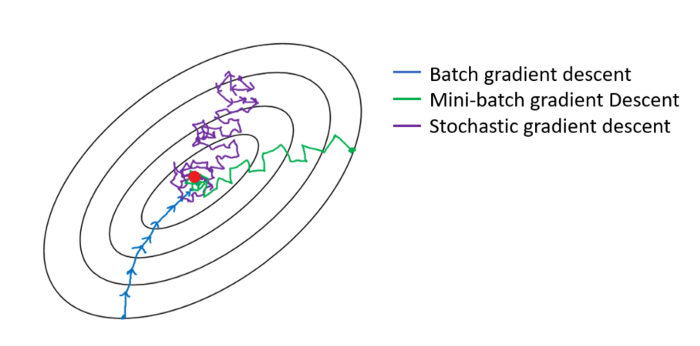

## Implementation

### Data Loading and Preprocessing

In [ ]:
#Import libraries
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [ ]:
#Loading Iris dataset from  sklearn library
Iris = datasets.load_iris()

This Iris dataset comes in a dictionary format. The features are in the key ‘data’ and the target is in a key ‘target’.

In [ ]:
#Here are all the keys
list(Iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [ ]:
#Now for just data preprocessing purpose lets convert the data into Dataframe
df_I = pd.DataFrame(iris['data'])
df_I['Species'] = pd.DataFrame(iris['target'])
df_I

,0,1,2,3,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
Iris_shape=df_I.shape
print("Number of rows:",Iris_shape[0])
print("Number of columns:",Iris_shape[1])

Number of rows: 150
Number of columns: 5


In [ ]:
#Displaying datatype of each column
df_I.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        150 non-null    float64
 1   1        150 non-null    float64
 2   2        150 non-null    float64
 3   3        150 non-null    float64
 4   Species  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
#Checking for null values
df_I.isnull().sum()

0          0
1          0
2          0
3          0
Species    0
dtype: int64

In [ ]:
df_I['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [ ]:
#In the species column, there are numbers only. But those numbers represent the species of the iris flower. Target_names key in the iris dataset shows them.
#I will just replace those number with real name of species
df_I['Species'] = df_I['Species'].replace({0: "Iris-setosa", 1: "Iris-versicolor", 2: 'Iris-virginica'})


In [ ]:
df_I['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [ ]:
#Splitting the dependent and independent data
X=Iris.data[0:99,:2]
y=Iris.target[0:99]

(1.5, 4.9)

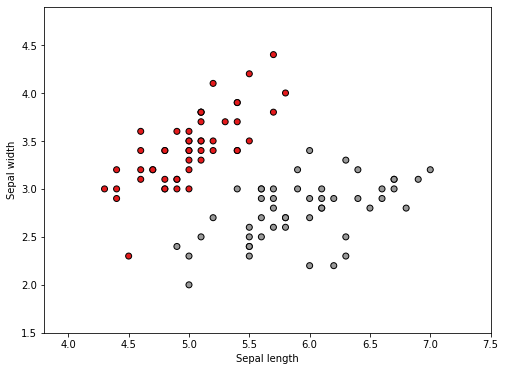

In [ ]:
#plotting the training points
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
plt.figure(2, figsize=(8, 6))
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

Algorithm:

Step 1: Randomly, initialsing all the parameters i.e. weights and bias.

Step 2: Apply sigmoid functon and get y predictions using randomly generated weights.

Step 3: Calculate Loss Function i.e. cost

Step 4: Calculate Gradient

Step 5: Update weight and bias

Step 6: Keep repeating steps 2 to 5 till the convergence.

Note: The amount of batch of training data use depends on the type of Gradient Descent we are using.

Example: 
Batch Gradient Descent uses the whole batch of training data at every step whereas  Stochastic Gradient Descent only chooses one instance from the training set at each step and updates the gradient based on that one record.



### Batch Gradient Descent Function

In [ ]:
# Function for batch gradient decent    
def Batch_GD (Learning_Rate,num_iterations,X,y):
    #Step 1: Initial Parameter
    N=len(X)
    w=np.zeros((X.shape[1],1))
    b=0
    costs=[]
    # Starting Loop
    for i in range(num_iterations):
        #Step 2: Apply Sigmoid Function and get y prediction
        Z=np.dot(w.T,X.T)+b
        y_pred=1/(1+1/np.exp(Z))
        
        #Step 3: Calculate Loss Function
        cost=-(1/N)*np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
        
        #Step 4: Calculate Gradient
        dw=1/N*np.dot(X.T,(y_pred-y).T)
        db=1/N*np.sum(y_pred-y)
        
        #Step 5: Update w & b
        w = w - Learning_Rate * dw
        b = b - Learning_Rate * db
        
        # Records cost
        if i % 1000 == 0:
            costs.append(cost)
            #print(cost)
    return(w,b,costs)
# Run a function
Result_BatchGD=Batch_GD(Learning_Rate=0.01,num_iterations=100000,X=X,y=y)
w,b,costs=Result_BatchGD
print("Weights:",w)
print("Bias:",b)
print("Costs:",costs)

Weights: [[ 6.01038124]
 [-9.42719952]]
Bias: -3.3695258945164857
Costs: [0.6931471805599454, 0.3478716362841821, 0.2417539651400085, 0.19194229570230933, 0.16291980320624222, 0.14380614589560353, 0.13019735106252764, 0.11997268190004685, 0.1119831277573591, 0.10555080414937817, 0.10024916156959689, 0.09579591427990404, 0.09199651615812203, 0.08871234704500203, 0.08584184567525319, 0.08330882281668943, 0.08105495066985138, 0.07903478152273853, 0.07721235238801327, 0.0755588146678394, 0.07405074411632555, 0.07266891303627201, 0.0713973831888225, 0.07022282544151101, 0.06913400245457503, 0.0681213704156397, 0.06717676892645073, 0.06629317700433245, 0.06546451925621503, 0.06468551054159836, 0.06395153045853487, 0.06325852115327883, 0.06260290352868933, 0.06198150808356907, 0.061391517474457605, 0.060830418535883925, 0.06029596198288384, 0.05978612839199044, 0.05929909934350978, 0.05883323283015834, 0.05838704221074988, 0.057959178124143404, 0.05754841288672609, 0.057153626982750574, 0.056

### Stochastic Gradient Descent

In [ ]:
# Function for Stochastic Gradient Descent       
def Stochastic_GD (Learning_Rate,num_iterations,X,y):
    # Step 1: Initial Parameter
    N=len(X)
    w=np.zeros((X.shape[1],1))
    b=0
    costs=[]
    # Starting two layer of loops
    for i in range(num_iterations):
        for j in range(N):
            # Choose 1 record
            XX=X[j,:]
            yy=y[j]
            # Step 2: Apply Sigmoid Function and get y prediction
            Z=np.dot(w.T,XX.T)+b
            y_pred=1/(1+1/np.exp(Z))
            #Step 3: Calculate Loss Function
            cost=-(yy*np.log(y_pred)+(1-yy)*np.log(1-y_pred))
            #Step 4: Calculate Gradient
            dw=np.multiply(XX,(y_pred-yy)).reshape((2,1))
            db=y_pred-yy
            #Step 5: Update w & b
            w = w - Learning_Rate * dw
            b = b - Learning_Rate * db
        
        #Step 6: Calculate Loss Function       
        Z_full=np.dot(w.T,X.T)+b
        y_pred_full=1/(1+1/np.exp(Z_full))
        cost=-(1/N)*np.sum(y*np.log(y_pred_full)+(1-y)*np.log(1-y_pred_full))
        #Records cost
        if i % 100 == 0:
            costs.append(cost)
            #print(cost)
    
    return(w,b,costs)
# Run a function
Result_Stoc_GD=Stochastic_GD(Learning_Rate=0.01,num_iterations=2000,X=X,y=y)
w,b,costs=Result_Stoc_GD
print("Weights:",w)
print("Bias:",b)
print("Costs:",costs)

Weights: [[  7.14284581]
 [-10.56306387]]
Bias: [-5.79360985]
Costs: [1.3325081573516875, 0.13137096882828592, 0.08247526190374836, 0.0676975285902604, 0.06042343363830266, 0.055993511620820606, 0.05294534898186306, 0.050672641585502116, 0.04887853848468058, 0.047400574164025586, 0.046142421502597765, 0.04504341279990034, 0.044063492871319054, 0.04317519430439649, 0.04235908653748456, 0.04160106234981413, 0.04089065104568623, 0.04021993225937629, 0.039582815081637246, 0.03897454695939638]


### Mini_Batch Gradient Descent

In [ ]:
# Function for mini batch Gradient Descent
def Minibatch_GD (Learning_Rate,num_iterations,X,y,Minibatch):
    # Part 1: Mini Batch 
    np.random.seed(1000)
    N=len(X)
    mini_batches=[]
    
    #Step 1: Shuffle (X,y)
    permutation=list(np.random.permutation(N))
    shuffled_X=X[permutation,:]
    shuffled_y=y[permutation]
    
    #Step 2: Partition
    num_complete_minibatches=int(np.floor(N/Minibatch))
    
    for i in range(num_complete_minibatches):
        mini_batch_X=shuffled_X[i*Minibatch:(i+1)*Minibatch,:]
        mini_batch_y=shuffled_y[i*Minibatch:(i+1)*Minibatch]
        
        mini_batch = (mini_batch_X, mini_batch_y)
        mini_batches.append(mini_batch)
    
    if N % Minibatch !=0:
        mini_batch_X=shuffled_X[N-Minibatch:N,:]
        mini_batch_y=shuffled_y[N-Minibatch:N]
        
        mini_batch = (mini_batch_X, mini_batch_y)
        mini_batches.append(mini_batch)
    
    # Part 2: Gradient Descent
    w=np.zeros((X.shape[1],1))
    b=0
    costs=[]
    
    for i in range(num_iterations):
        for j in range(num_complete_minibatches+1):
            #Select Minibatch
            XX=mini_batches[j][0]
            yy=mini_batches[j][1]
            #Step 2: Apply Sigmoid Function and get y prediction
            Z=np.dot(w.T,XX.T)+b
            y_pred=1/(1+1/np.exp(Z))
            
            #Step 3: Calculate Gradient
            dw=1/Minibatch*np.dot(XX.T,(y_pred-yy).T)
            db=1/Minibatch*np.sum(y_pred-yy)
            #Step 4: Update w & b
            w = w - Learning_Rate * dw
            b = b - Learning_Rate * db
        
        #Step 5: Calculate Loss Function       
        Z_full=np.dot(w.T,X.T)+b
        y_pred_full=1/(1+1/np.exp(Z_full))
        cost=-(1/N)*np.sum(y*np.log(y_pred_full)+(1-y)*np.log(1-y_pred_full))
        
        if i % 1000 ==0:
            costs.append(cost)
            #print(cost)
            
    return(w,b,costs)
# Run a function
Result_MiniGD=Minibatch_GD(Learning_Rate=0.01,num_iterations=100000,X=X,y=y,Minibatch=50)
w,b,costs=Result_MiniGD
print("Weights:",w)
print("Bias:",b)
print("Costs:",costs)

Weights: [[  7.07024305]
 [-10.46482817]]
Bias: -5.862588193986873
Costs: [0.691622450268515, 0.2423791300612034, 0.16319302905964775, 0.1302727330225592, 0.11193879928571474, 0.10012576097946974, 0.09181754584341731, 0.08562206003552769, 0.08080419608809879, 0.07693751263523896, 0.07375680966795949, 0.07108807844314517, 0.06881217344178268, 0.06684463350339102, 0.06512383445440985, 0.06360370786117925, 0.06224909090464575, 0.061032657846182635, 0.05993283721000969, 0.05893236283924839, 0.05801724387816049, 0.05717601838541393, 0.05639920314100122, 0.055678881793988465, 0.055008392257240454, 0.05438208642447152, 0.053795143343723234, 0.05324342241891828, 0.0527233469432215, 0.052231810869865405, 0.05176610356635198, 0.05132384861689184, 0.050902953694926936, 0.05050156922991041, 0.05011805411343236, 0.04975094708001067, 0.049398942692888845, 0.04906087109019531, 0.048735680819824094, 0.048422424225446424, 0.048120244950680804, 0.047828367210658106, 0.04754608654523702, 0.04727276181986

### Visualising the results

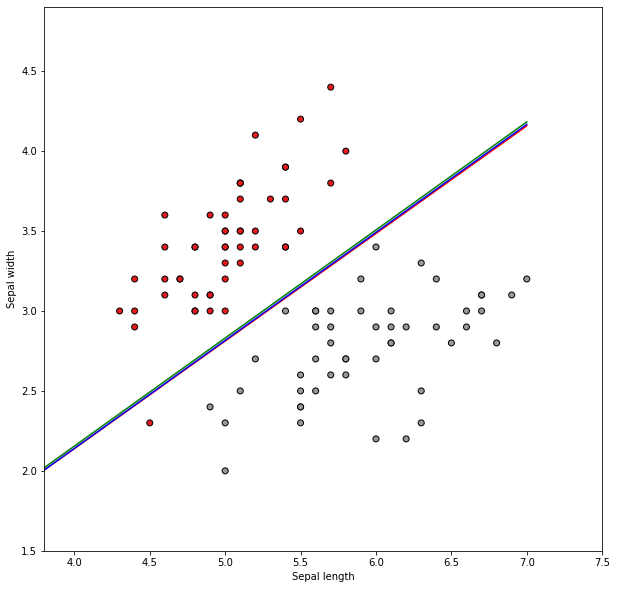

In [ ]:
# Plot linear classification
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (10,10)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
line_B_GD=mlines.Line2D([0,7],[-0.5527,4.1577],color='red')
line_Mini_GD=mlines.Line2D([0,7],[-0.56185,4.1674],color='blue')
line_Sto_GD=mlines.Line2D([0,7],[-0.5488,4.1828],color='green')
ax.add_line(line_B_GD)
ax.add_line(line_Mini_GD)
ax.add_line(line_Sto_GD)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

From above figure, we can see that three kinds of gradient descents generate similar linear decision boundry.

Though we can see that all types of Gradient descent generate almost similar result but when we are having large dataset we mostly use Stochastic Gradient Descent instead of Batch Gradient Descent because Stochastic Gradient Descent only chooses one instance from the training set at each step and updates the gradient based on that one record. Stochastic Gradient Descent has the benefit of being significantly quicker at each iteration, which overcomes the restriction of Batch Gradient Descent.

On the other hand if you want to drop cost function more gradually and steadily , you can use Mini-batch Gradient Descent instead of  Stochastic Gradient Descent.





### Gradient Descent Using Sklearn Library

Stochastic Gradient Descent (SGD) classifier basically implements a plain SGD learning routine supporting various loss functions and penalties for classification. Scikit-learn provides SGDClassifier module to implement SGD classification.

This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning via the partial_fit method. For best results using the default learning rate schedule, the data should have zero mean and unit variance.

This implementation works with data represented as dense or sparse arrays of floating point values for the features. The model it fits can be controlled with the loss parameter; by default, it fits a linear support vector machine (SVM).

The regularizer is a penalty added to the loss function that shrinks model parameters towards the zero vector using either the squared euclidean norm L2 or the absolute norm L1 or a combination of both (Elastic Net). If the parameter update crosses the 0.0 value because of the regularizer, the update is truncated to 0.0 to allow for learning sparse models and achieve online feature selection.

**Some of the parameters:**

**penalty{‘l2’, ‘l1’, ‘elasticnet’}, default=’l2’:**

The penalty (aka regularization term) to be used. Defaults to ‘l2’ which is the standard regularizer for linear SVM models. ‘l1’ and ‘elasticnet’ might bring sparsity to the model (feature selection) not achievable with ‘l2’.

**max_iterint, default=1000**

The maximum number of passes over the training data (aka epochs). It only impacts the behavior in the fit method, and not the partial_fit method.


**tolfloat, default=1e-3**

The stopping criterion. If it is not None, training will stop when (loss > best_loss - tol) for n_iter_no_change consecutive epochs. Convergence is checked against the training loss or the validation loss depending on the early_stopping parameter.



In [ ]:
from sklearn import linear_model
SGDClf = linear_model.SGDClassifier(max_iter = 1000, tol=1e-3,penalty = "elasticnet")
SGDClf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='elasticnet', power_t=0.5, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=False)

In [ ]:
#We can get the weight vector with the help of following python script
SGDClf.coef_

array([[ 135.24070231, -206.77827367]])

In [ ]:
#We can get the intercept with the help of following python script
SGDClf.intercept_

array([-48.26341106])

**Other Methods:**

decision_function(X): Predict confidence scores for samples.

densify(): Convert coefficient matrix to dense array format.

fit(X, y[, coef_init, intercept_init, …]): Fit linear model with Stochastic Gradient Descent.

get_params([deep]): Get parameters for this estimator.

partial_fit(X, y[, classes, sample_weight]): Perform one epoch of stochastic gradient descent on given samples.

predict(X): Predict class labels for samples in X.

predict_log_proba(X): Log of probability estimates.

predict_proba(X): Probability estimates.

score(X, y[, sample_weight]): Return the mean accuracy on the given test data and labels.

set_params(**params): Set the parameters of this estimator.

sparsify(): Convert coefficient matrix to sparse format.

There is no "typical gradient descent" because it is rarely used in practise. If you can decompose your loss function into additive terms, then stochastic approach is known to behave better (thus SGD) and if you can spare enough memory - OLS method is faster and easier (thus first solution).

### Conclusion

Finally, you learned about the most common types of gradient descent and how to implement those algorithms in python. You came to know use of Gradient descent in Machine learning and how it can helps you in training the model.This knowledge enables you to better understand not only machine learning but also deep learning. 

References:
1. https://scikit-learn.org/stable/
2. https://builtin.com/data-science/gradient-descent
3. https://www.analyticsvidhya.com/blog/2020/10/how-does-the-gradient-descent-algorithm-work-in-machine-learning/
5.  https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html
4. https://towardsdatascience.com/stochastic-gradient-descent-explanation-and-complete-implementation-from-scratch-a2c6a02f28bd
6. Aurélien Géron, Hands-On Machine Learning with Scikit-Learn & TensorFlow, 2018